# 1 - Introduction

Training your neural network requires specifying an initial value of the weights. A well chosen initialization method will help learning.  

In the first lessons you probably followed our instructions for weight initialization, and it has worked out so far. But how do you choose the initialization for a new neural network? In this notebook, you will see how different initializations lead to different results. 

# 2 - Import packages

In [39]:
!pip install mlxtend==0.17.3

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pytz
import sklearn
import sklearn.datasets
import scipy.io
import time
from mlxtend.plotting import plot_decision_regions


%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# 3 - Import the dataset

In [41]:
def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y.ravel(), s=40, cmap=plt.cm.Spectral);
    train_X = train_X
    train_Y = train_Y.reshape((train_Y.shape[0],1))
    test_X = test_X
    test_Y = test_Y.reshape((test_Y.shape[0]),1)
    return train_X, train_Y, test_X, test_Y

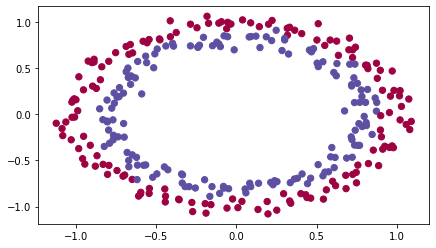

In [5]:
train_x,train_y,test_x,test_y = load_dataset()

In [42]:
print("Shape\nTrain_x: {0} \t Train_y: {1}\nTest_x: {2} \t Test_y: {3}\n".format(train_x.shape,train_y.shape,test_x.shape,test_y.shape))

Shape
Train_x: (300, 2) 	 Train_y: (300, 1)
Test_x: (100, 2) 	 Test_y: (100, 1)



# 4 - Zero Initialization

In [43]:
class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_begin(self, batch, logs=None):
    self.begins = time.time()
    print('Training: begins at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%Y-%m-%d %H:%M:%S")))

  def on_train_end(self, logs=None):
    print('Training: ends at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%Y-%m-%d %H:%M:%S")))
    print('Duration: {}s'.format(time.time() - self.begins))

In [44]:
# Configure the random see for the reproducibility purposes
tf.random.set_seed(3)

# Instantiate a simple classification model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.Zeros()),
                             tf.keras.layers.Dense(5, activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.Zeros()),
                             tf.keras.layers.Dense(1, activation = tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.Zeros())
                             ])

# Instantiate a logistic loss function that expects integer targets (binary classification 0 or 1)
loss = tf.keras.losses.BinaryCrossentropy()

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.BinaryAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# configure the optimizer, loss, and metrics to monitor.
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

# training 
history = model.fit(x=train_x,
                    y=train_y,
                    batch_size=32,
                    epochs=1000,
                    validation_data=(test_x,test_y),
                    callbacks=[MyCustomCallback()],
                    verbose=0)

Training: begins at 2020-08-30 19:53:31
Training: ends at 2020-08-30 19:53:55
Duration: 24.663549184799194s


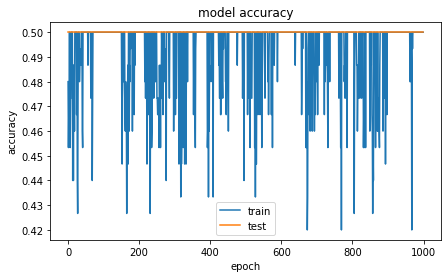

In [45]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

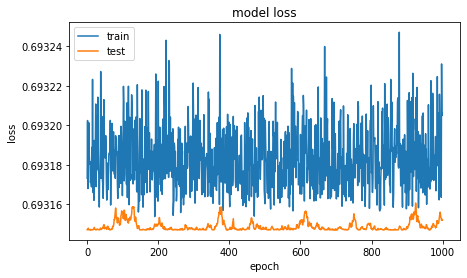

In [46]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [47]:
loss, acc = model.evaluate(x=train_x,y=train_y, batch_size=32)
print('Train loss: %.3f - acc: %.3f' % (loss, acc))

loss_, acc_ = model.evaluate(x=test_x,y=test_y, batch_size=32)
print('Test loss: %.3f - acc: %.3f' % (loss_, acc_))

10/10 [==============================] - 0s 1ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Train loss: 0.693 - acc: 0.500
4/4 [==============================] - 0s 2ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Test loss: 0.693 - acc: 0.500


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


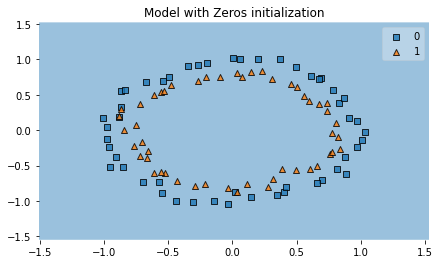

In [49]:
from mlxtend.plotting import plot_decision_regions
# Plot decision boundary
plot_decision_regions(test_x,test_y.squeeze(), clf=model,zoom_factor=2.0)
plt.title("Model with Zeros initialization")
plt.show()

<mark><b>Exercise</b></mark>

- See the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/initializers) and evaluate other constant initializers

In [ ]:
# PUT YOUR CODE HERE

# 5 - Random Initialization

In [57]:
# Configure the random see for the reproducibility purposes
tf.random.set_seed(3)


# Instantiate a simple classification model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.RandomNormal(mean=10,stddev=1)),
                             tf.keras.layers.Dense(5, activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.RandomNormal(mean=10,stddev=1)),
                             tf.keras.layers.Dense(1, activation = tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.RandomNormal(mean=10,stddev=1))
                             ])

# Instantiate a logistic loss function that expects integer targets (binary classification 0 or 1)
loss = tf.keras.losses.BinaryCrossentropy()

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.BinaryAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# configure the optimizer, loss, and metrics to monitor.
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

# training 
history = model.fit(x=train_x,
                    y=train_y,
                    batch_size=32,
                    epochs=1000,
                    validation_data=(test_x,test_y),
                    callbacks=[MyCustomCallback()],
                    verbose=0)

Training: begins at 2020-08-30 19:58:07
Training: ends at 2020-08-30 19:58:32
Duration: 24.91222357749939s


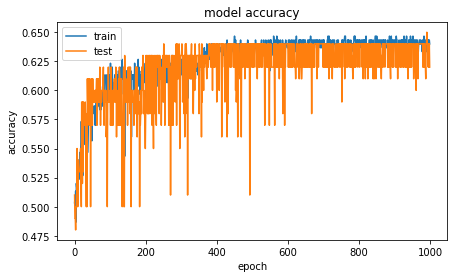

In [58]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

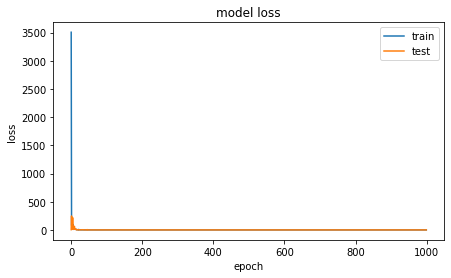

In [59]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [60]:
loss, acc = model.evaluate(x=train_x,y=train_y, batch_size=32)
print('Train loss: %.3f - acc: %.3f' % (loss, acc))

loss_, acc_ = model.evaluate(x=test_x,y=test_y, batch_size=32)
print('Test loss: %.3f - acc: %.3f' % (loss_, acc_))

10/10 [==============================] - 0s 2ms/step - loss: 0.5387 - binary_accuracy: 0.6433
Train loss: 0.539 - acc: 0.643
4/4 [==============================] - 0s 2ms/step - loss: 0.5542 - binary_accuracy: 0.6200
Test loss: 0.554 - acc: 0.620


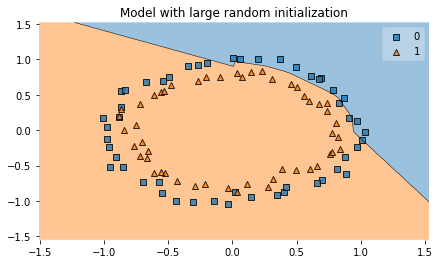

In [61]:
from mlxtend.plotting import plot_decision_regions
# Plot decision boundary
plot_decision_regions(test_x,test_y.squeeze(), clf=model,zoom_factor=2.0)
plt.title("Model with large random initialization")
plt.show()

<mark><b>Exercise</b></mark>

- Configure the random initializer with mean equal to zero.
- Congigure the initializer for tf.keras.initializers.he_normal()

In [ ]:
# PUT YOUR CODE HERE